In [1]:
import yfinance as yf

In [2]:
ticker = 'BTC-USD'

data = yf.download(ticker, auto_adjust=True, start = '2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import sys
sys.path.append("../")
sys.path.append("../algo_trader")

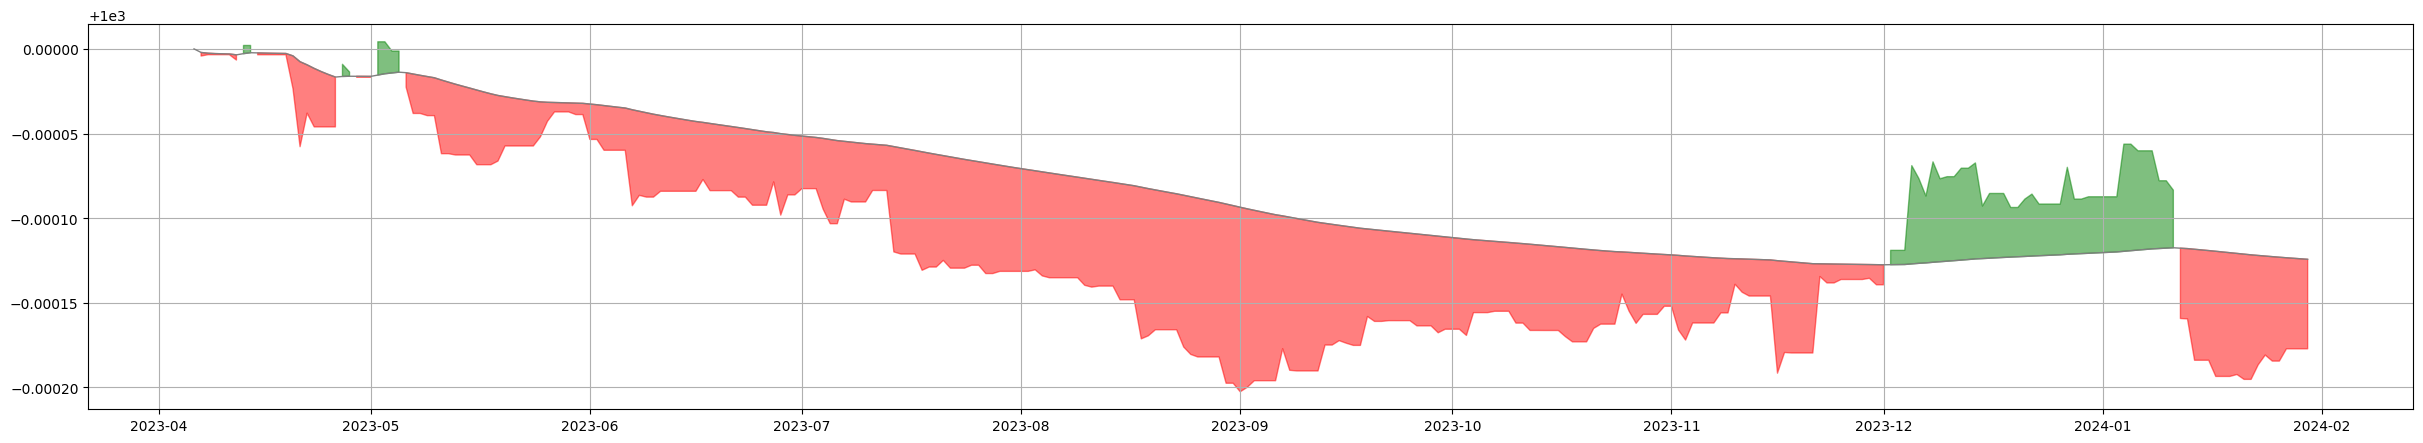

In [4]:
from algo_trader.lib.indicators.nvi import NVI

df = data.iloc[-300:]
nvi = NVI(255)
nvi.calculate(df)
nvi.plot()

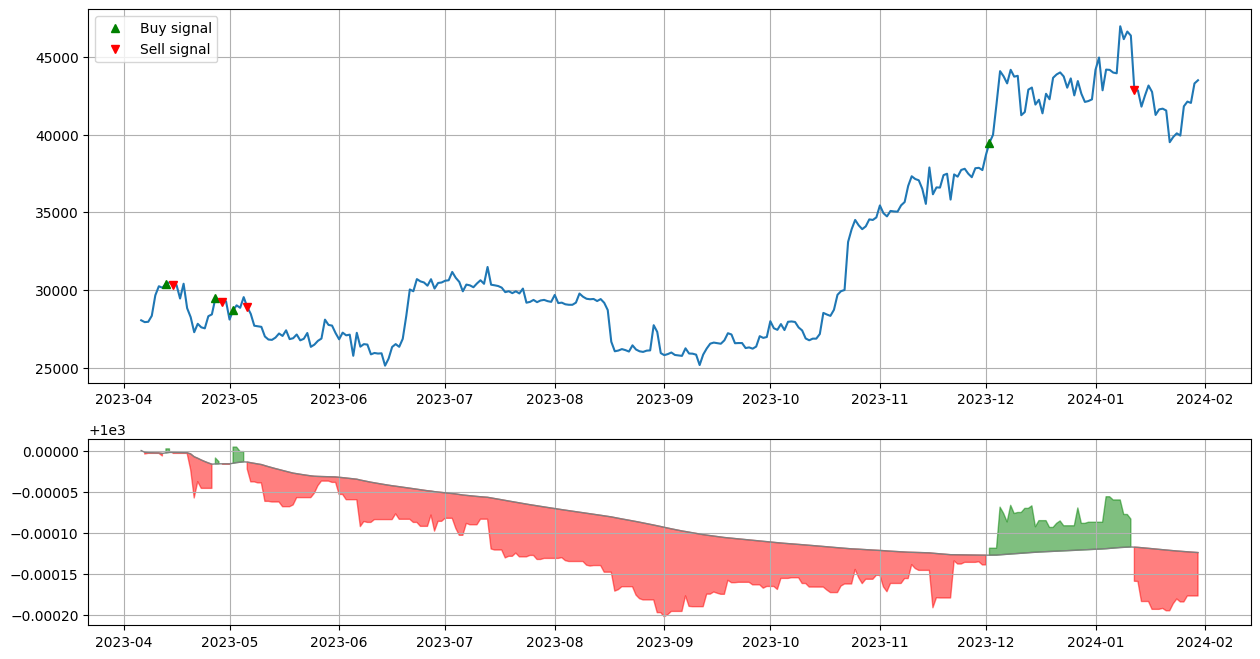

In [5]:
import matplotlib.pyplot as plt

# Armo los dos subgráficos con subplots
# figsize: Es la dimensión de toda la figura, que contiene los subgráficos
# nrows: Es la cantidad de subgráficos
# height_ratios: Se coloca la proporción de alturas entre los subgráficos (la cantidad de elementos debe coincidir con las nrows ingresadas)
fig, ax = plt.subplots(figsize=(15,8), nrows=2, gridspec_kw={'height_ratios' : [2,1]})

df_nvi = nvi.calculate(df)
df_nvi['buy_signal'] = nvi.calc_buy_signals()
df_nvi['sell_signal'] = nvi.calc_sell_signals()
buySignals = df_nvi[df_nvi['buy_signal'] == True]
sellSignals = df_nvi[df_nvi['sell_signal'] == True]

ax[0].plot(df_nvi.index, df_nvi.Close)
ax[0].plot(buySignals.index, buySignals.Close, '^', label='Buy signal', color='green')
ax[0].plot(sellSignals.index, sellSignals.Close, 'v', label='Sell signal', color='red')
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].plot(df_nvi["NVI_EMA"], color='gray', linewidth=1)
ax[1].fill_between(df_nvi.index, df_nvi["NVI"], df_nvi["NVI_EMA"], where=df_nvi["NVI"] > df_nvi["NVI_EMA"], alpha=0.5, color='green')
ax[1].fill_between(df_nvi.index, df_nvi["NVI"], df_nvi["NVI_EMA"], where=df_nvi["NVI"] < df_nvi["NVI_EMA"], alpha=0.5, color='red')
ax[1].grid()

In [6]:
new_record = data.iloc[-1:]
nvi.predict_signal(new_record)

[NVI] Current nvi value: 999.9998228230734
[NVI] Current nvi_ema value: 999.999875411841
[NVI] Signal: Action.HOLD


<Action.HOLD: 'hold'>